In the previous notebook, we used k-means to cluster the iris samples into three clusters. But how can we evaluate the quality of this clustering?

## Evaluating a clustering
A direct approach is to compare the clusters with the iris species. You'll learn about this first, before considering the problem of how to measure the quality of a clustering in a way that doesn't require our samples to come pre-grouped into species. This measure of quality can then be used to make an informed choice about the number of clusters to look for.

Firstly, let's check whether the 3 clusters of iris samples have any correspondence to the iris species by means of  "cross-tabulations".

Import pandas, and then create a two-column DataFrame, where the first column is cluster labels and the second column is the iris species, so that each row gives the cluster label and species of a single sample.

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [15]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
print("Target names:[0   1   2]")

Target names:[0   1   2]


In [17]:
print("Target(y):")
print(iris.target)

Target(y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [19]:
# store feature matrix in "X" - captialized as it represents matrix
X = iris.data

# store response vector in "y" - capitalized as it represents a vector
y = iris.target

In [21]:
import pandas as pd
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [40]:
ct = pd.crosstab(iris.target,iris.feature_names)
print(ct)

col_0 sepal length (cm)
col_1  sepal width (cm)
col_2 petal length (cm)
col_3  petal width (cm)
row_0                  
0                    50
1                    50
2                    50


How can the quality of a clustering be evaluated in these cases?

## Measuring clustering quality
We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.


How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids. We want clusters that are not spread out, so lower values of the inertia are better. The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, kmeans aims to place the clusters in a way that minimizes the inertia.

In [53]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(iris.data)
print(model.inertia_)

78.851441426146


In [54]:
ct = pd.crosstab(iris.target,model.labels_)
print(ct)

col_0   0   1   2
row_0            
0       0  50   0
1      48   0   2
2      14   0  36


Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

#### How many clusters to choose?
Ultimately, this is a trade-off. A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. A good rule of thumb is to choose an elbow in the inertia plot, that is, a point where the inertia begins to decrease more slowly. For example, by this criterion, 3 is a good number of clusters for the iris dataset.

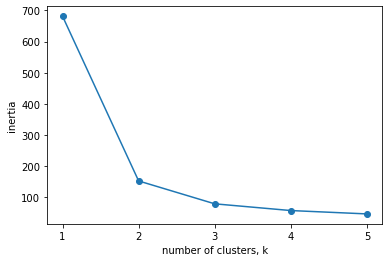

In [46]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(iris.data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Exercie :

In [4]:
import pandas as pd
samples = pd.read_csv('seeds.csv')

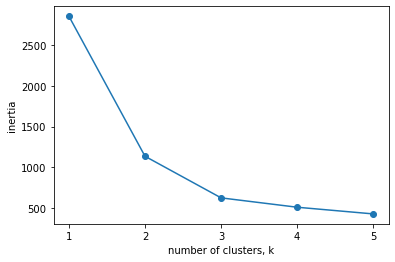

In [5]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [6]:
varieties = [
'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

print("Varieties size # ", np.size(varieties))

Varieties size #  209


In [7]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)
# varies

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0          63          10
1                       0           1          60
2                      70           5           0
